# Data curation

## Finding the Data

### Import some necessary functions

In [1]:
import os, pydicom
import numpy as np
import pydicom 

### Find where we put our data

In [17]:
print(os.listdir('..'))

['Code', '.idea', 'Presentation Outline.pptx', 'Data']


In [2]:
data_path = os.path.join('..','Data','Whole_Patients')
print('We have ' + str(len(os.listdir(data_path))) + ' patients!')

We have 20 patients!


## Ensuring contour fidelity...

### Import some functions

This is our Dicom_Reader, we'll use it to handle our imaging and masks

In [3]:
from Dicom_RT_and_Images_to_Mask.Image_Array_And_Mask_From_Dicom_RT import DicomImagestoData, plot_scroll_Image

### What are the contour names we have?

Note that we've set 'get_images_mask' to False, this means we won't be getting any of the image data, just looking at the dicom RT files

In [4]:
Dicom_Reader = DicomImagestoData(path=data_path,get_images_mask=False) # Set the get_images_mask to False so it will be fast

['RS_MRNMED_LYMPH_063_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNABD_LYMPH_007_1.2.752.243.1.1.20190411110641822.1200.551541.dcm']
['RS_MRNMED_LYMPH_024_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNABD_LYMPH_033_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNMED_LYMPH_017_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNABD_LYMPH_019_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNMED_LYMPH_055_1.2.752.243.1.1.20190411110641822.1200.551541.dcm']
['RS_MRNMED_LYMPH_073_1.2.752.243.1.1.20190411110641822.1200.551541.dcm']
['RS_MRNABD_LYMPH_069_1.2.752.243.1.1.20190411110641822.1200.551541.dcm']
['RS_MRNABD_LYMPH_028_1.2.752.243.1.1.20190411110641822.1200.551541.dcm']
['RS_MRNMED_LYMPH_075_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNMED_LYMPH_029_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNMED_LYMPH_069_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNMED_LYMPH_002_1.2.752.243.1.1.20190411

### View ROI names

#### This will tell us all the unique roi names, hence all_rois

In [5]:
for roi in Dicom_Reader.all_rois:
    print(roi)

Liver
bma_liver
best_liver
tried_liver
Liver_BMA_Program_4


## Make contour associations

#### We have quite a few contour names here.. now, we can either change the ROI names in the RT files, or make an associations file

#### The associations file associates a contour name with another one {'Current contour':'Desired name'}

In [6]:
associations = {'Liver_BMA_Program_4':'Liver','bma_liver':'Liver','best_liver':'Liver','tried_liver':'Liver'}

### Re-write RTs
#### This is commented out, because if I run it, then the example above won't show any different contour names

In [ ]:
# Dicom_Reader.associations = associations
# for RT in Dicom_Reader.all_RTs:
#     Dicom_Reader.rewrite_RT(RT)

## Pulling images and mask

### We'll first do this with one patient

In [22]:
patient_data_path = os.path.join(data_path,'ABD_LYMPH_007')
Dicom_Reader = DicomImagestoData(path=patient_data_path,get_images_mask=True,associations=associations)
print('Done!')

Done!


In [8]:
print(Dicom_Reader.rois_in_case)

['bma_liver']


In [24]:
Dicom_Reader.get_mask(['Liver']) # Tell the class to load up the mask with contour name 'Liver'
print('Done')

Done


# View images

In [10]:
%matplotlib notebook

### The images and mask are saved within the Dicom_Reader class, so we just have to load them

In [25]:
Images = Dicom_Reader.ArrayDicom
mask = Dicom_Reader.mask # This is the mask

#### Threshold

In [26]:
Images[Images<-100] = -100
Images[Images>100] = 100

<IPython.core.display.Javascript object>


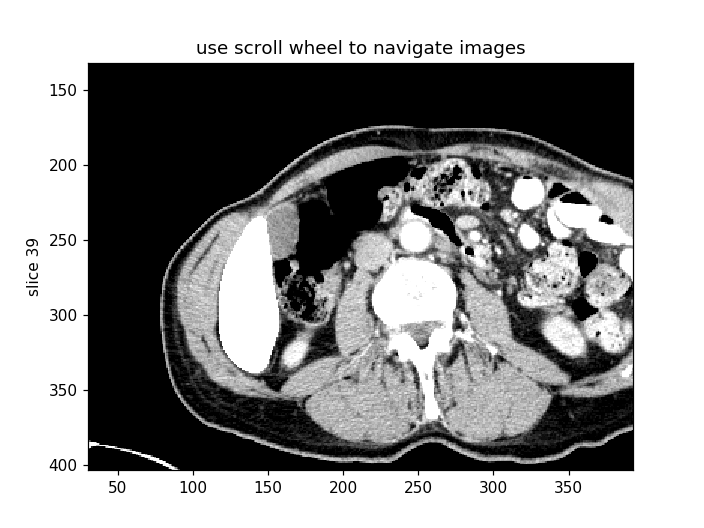

(<Figure size 640x480 with 1 Axes>,
 <Dicom_RT_and_Images_to_Mask.Image_Array_And_Mask_From_Dicom_RT.IndexTracker at 0x2211c72a710>)

In [27]:
plot_scroll_Image(Images)

In [28]:
Images[mask[...,0]==1] = 150

<IPython.core.display.Javascript object>


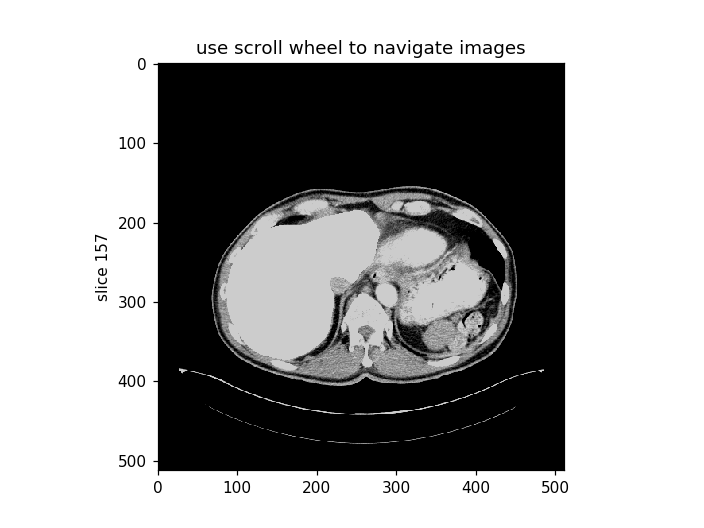

(<Figure size 640x480 with 1 Axes>,
 <Dicom_RT_and_Images_to_Mask.Image_Array_And_Mask_From_Dicom_RT.IndexTracker at 0x2211cb095f8>)

In [15]:
plot_scroll_Image(Images)

# Recap

## Checking ROI contour names and making associations

## Loading in image and mask from desired contour name

## Viewing images and mask